# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [5]:
import requests
import csv
import os
import numpy as np

def fetch_all_pokemon_stats():
    base_url = "https://pokeapi.co/api/v2/pokemon"
    results = []

    next_url = base_url
    while next_url:
        response = requests.get(next_url)
        if response.status_code == 200:
            data = response.json()
            for pokemon in data["results"]:

                pokemon_details = requests.get(pokemon["url"]).json()
                name = pokemon_details["name"]
                stats = {
                    stat['stat']['name']: stat['base_stat']
                    for stat in pokemon_details["stats"]
                }
                results.append({"name": name, **stats})
            next_url = data["next"]
        else:
            print(f"Failed to fetch data: {response.status_code}")
            break

    return results

def save_to_csv(file_name, data):
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=["name", "hp", "attack", "defense", "special-attack", "special-defense", "speed"])
        writer.writeheader()
        writer.writerows(data)

def load_from_csv(file_name):
    with open(file_name, mode='r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        return [row for row in reader]

def main():
    file_name = "pokemon_stats.csv"

    if os.path.exists(file_name):
        print(f"Loading data from {file_name}...")
        all_pokemon_stats = load_from_csv(file_name)
    else:
        print("Fetching data from PokeAPI...")
        all_pokemon_stats = fetch_all_pokemon_stats()
        save_to_csv(file_name, all_pokemon_stats)
        print(f"Data saved to {file_name}.")

    for pokemon in all_pokemon_stats[:5]:
        print(pokemon)

if __name__ == "__main__":
    main()


Loading data from pokemon_stats.csv...
{'name': 'bulbasaur', 'hp': '45', 'attack': '49', 'defense': '49', 'special-attack': '65', 'special-defense': '65', 'speed': '45'}
{'name': 'ivysaur', 'hp': '60', 'attack': '62', 'defense': '63', 'special-attack': '80', 'special-defense': '80', 'speed': '60'}
{'name': 'venusaur', 'hp': '80', 'attack': '82', 'defense': '83', 'special-attack': '100', 'special-defense': '100', 'speed': '80'}
{'name': 'charmander', 'hp': '39', 'attack': '52', 'defense': '43', 'special-attack': '60', 'special-defense': '50', 'speed': '65'}
{'name': 'charmeleon', 'hp': '58', 'attack': '64', 'defense': '58', 'special-attack': '80', 'special-defense': '65', 'speed': '80'}


# What role can Skiddo best play in a Pokémon team?

Skiddo is a Grass-type Goat Pokémon introduced in Generation VI. Since goats are the best animal, Skiddo is clearly the best Pokémon. Sadly, the Skiddo community has been consistently screwed over by GameFreak. Because Skiddo is a stage 1 Pokémon and can be encountered early on, I expect it to be much weaker than most other Pokémon. Even if inefficient in combat, Skiddo's many other skills (being cute) make it vital to a Pokémon team. So, if someone were evil enough to attack a Skiddo and its team, what role in that team could Skiddo best play?

# My Analysis

Percentiles:
Hp: 46.77 percentile
Attack: 36.33 percentile
Defense: 18.43 percentile
Special-attack: 44.47 percentile
Special-defense: 31.87 percentile
Speed: 31.34 percentile


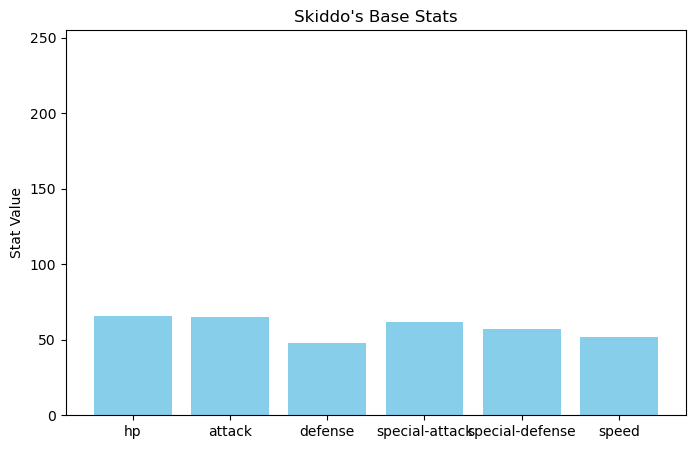

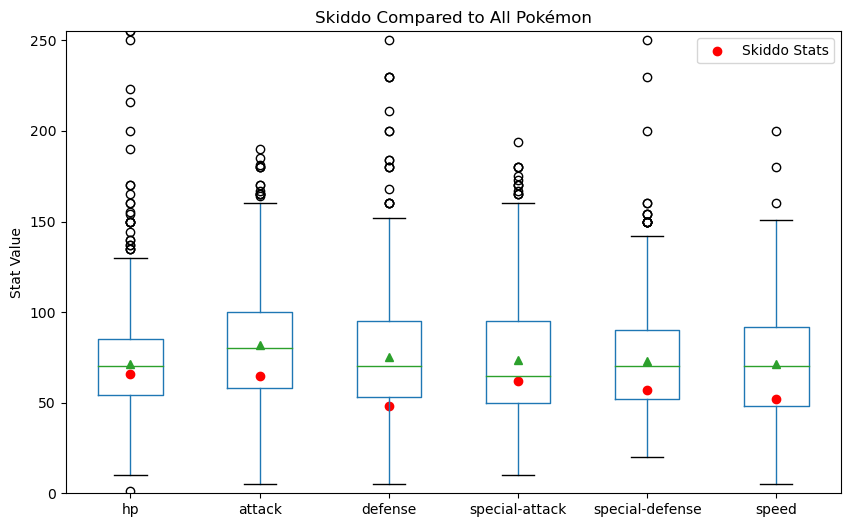

Mean and Standard Deviation:
Hp: Mean = 71.26, Std Dev = 26.76, Z-Score = -0.20
Attack: Mean = 81.58, Std Dev = 31.67, Z-Score = -0.52
Defense: Mean = 75.24, Std Dev = 30.49, Z-Score = -0.89
Special-attack: Mean = 73.65, Std Dev = 32.47, Z-Score = -0.36
Special-defense: Mean = 72.97, Std Dev = 27.36, Z-Score = -0.58
Speed: Mean = 71.16, Std Dev = 30.31, Z-Score = -0.63


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def calculate_percentiles(pokemon_name, all_pokemon_stats):
    stats_keys = ["hp", "attack", "defense", "special-attack", "special-defense", "speed"]
    
    df = pd.DataFrame(all_pokemon_stats)
    for key in stats_keys:
        df[key] = pd.to_numeric(df[key], errors='coerce')

    target_pokemon = df[df['name'] == pokemon_name]
    if target_pokemon.empty:
        print(f"Pokemon {pokemon_name} not found in the data.")
        return None

    skiddo_stats = target_pokemon.iloc[0][stats_keys]

    percentiles = {
        stat: sum(df[stat] <= skiddo_stats[stat]) / len(df[stat]) * 100
        for stat in stats_keys
    }
    return percentiles

def generate_analysis(pokemon_name, all_pokemon_stats):
    stats_keys = ["hp", "attack", "defense", "special-attack", "special-defense", "speed"]
    
    df = pd.DataFrame(all_pokemon_stats)
    for key in stats_keys:
        df[key] = pd.to_numeric(df[key], errors='coerce')

    target_pokemon = df[df['name'] == pokemon_name]
    if target_pokemon.empty:
        print(f"Pokemon {pokemon_name} not found in the data.")
        return

    skiddo_stats = target_pokemon.iloc[0][stats_keys]

    percentiles = calculate_percentiles(pokemon_name, all_pokemon_stats)
    if percentiles:
        print("Percentiles:")
        for stat, percentile in percentiles.items():
            print(f"{stat.capitalize()}: {percentile:.2f} percentile")

    plt.figure(figsize=(8, 5))
    plt.bar(stats_keys, skiddo_stats, color='skyblue')
    plt.title(f"{pokemon_name.capitalize()}'s Base Stats")
    plt.ylabel("Stat Value")
    plt.ylim(0, 255)
    plt.show()

    plt.figure(figsize=(10, 6))
    df.boxplot(column=stats_keys, grid=False, showmeans=True)
    plt.scatter(range(1, len(stats_keys) + 1), skiddo_stats, color='red', label=f"{pokemon_name.capitalize()} Stats")
    plt.legend()
    plt.title(f"{pokemon_name.capitalize()} Compared to All Pokémon")
    plt.ylabel("Stat Value")
    plt.ylim(0, 255)
    plt.show()

    mean_stats = df[stats_keys].mean()
    std_stats = df[stats_keys].std()

    print("Mean and Standard Deviation:")
    for stat in stats_keys:
        mean = mean_stats[stat]
        std_dev = std_stats[stat]
        skiddo_stat = skiddo_stats[stat]
        z_score = (skiddo_stat - mean) / std_dev
        print(f"{stat.capitalize()}: Mean = {mean:.2f}, Std Dev = {std_dev:.2f}, Z-Score = {z_score:.2f}")

file_name = "pokemon_stats.csv"
all_pokemon_stats = load_from_csv(file_name)
generate_analysis("skiddo", all_pokemon_stats)

### Skiddo Analysis
Skiddo's defense is the worst, ranking in the 18th percentile out of all Pokémon. It can compensate for its poor defense via its highest stat, HP, which ranks in the 47th percentile. Even so, all of Skiddo's Z-scores are negative, meaning all of Skiddo's stats are below average. This is a sad day for Skiddo fans. Clearly, Skiddo's power lies not in its brawn, but in its beauty. This data suggests that Skiddo isn't suited to specialize in any role and instead is a jack of all trades. The good part of this is that it means Skiddo has no glaring weaknesses. Pokémon with average stats actually have a role they can specialize in: Support. Skiddo's moves make it a great support, providing both healing and buffs to its team.